In [1]:
import os, json, csv

In [2]:
#q1
q1List = []
q1List2 = []
q1List = os.listdir("data")
q1List.sort(reverse = True)
for i in range(len(q1List)):
    if q1List[i].startswith(".") != True:
        q1List2.append(q1List[i])
q1List2

['sample_reviews.json',
 'sample_reviews.csv',
 'review5.json',
 'review5.csv',
 'review4.json',
 'review4.csv',
 'review3.json',
 'review3.csv',
 'review2.json',
 'review2.csv',
 'review1.json',
 'review1.csv',
 'products.json']

In [3]:
#q2
q2List = []
for i in range(len(q1List2)):
    q2List.append(os.path.join("data", q1List2[i]))
q2List

['data/sample_reviews.json',
 'data/sample_reviews.csv',
 'data/review5.json',
 'data/review5.csv',
 'data/review4.json',
 'data/review4.csv',
 'data/review3.json',
 'data/review3.csv',
 'data/review2.json',
 'data/review2.csv',
 'data/review1.json',
 'data/review1.csv',
 'data/products.json']

In [4]:
#q3
q3List = []
for i in range(len(q2List)):
    if ".json" in q2List[i]:
        q3List.append(q2List[i])
q3List

['data/sample_reviews.json',
 'data/review5.json',
 'data/review4.json',
 'data/review3.json',
 'data/review2.json',
 'data/review1.json',
 'data/products.json']

In [5]:
#q4
q4List = []
for i in range(len(q1List)):
    if q1List[i].startswith("review"):
        q4List.append(os.path.join("data", q1List[i]))
q4List

['data/review5.json',
 'data/review5.csv',
 'data/review4.json',
 'data/review4.csv',
 'data/review3.json',
 'data/review3.csv',
 'data/review2.json',
 'data/review2.csv',
 'data/review1.json',
 'data/review1.csv']

In [6]:
#q5
import ast
def read_json_file(name):
    f = open(os.path.join("data", name), encoding="utf-8")
    msg = f.read()
    f.close()
    return ast.literal_eval(msg)
proDict = read_json_file("products.json")
proDict

{'B00QFQRELG': 'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders',
 'B01BH83OOM': 'Amazon Tap Smart Assistant Alexa enabled (black) Brand New',
 'B00ZV9PXP2': 'All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers',
 'B0751RGYJV': 'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping',
 'B00IOY8XWQ': 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers',
 'B0752151W6': 'All-new Echo (2nd Generation) with improved sound, powered by Dolby, and a new design Walnut Finish',
 'B018Y226XO': 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case',
 'B01ACEKAJY': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black',
 'B01AHB9CYG': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta',
 'B01AHB9CN2': 'All

In [7]:

def read_csv_file(name):
    rowList = []
    f = open(os.path.join("data", name), encoding="utf-8")
    reader = csv.DictReader(f)
    for row in reader:
        rowList.append(row)
    f.close()
    return rowList

def find_review_text_by_id(reviewid, filename):
    reviewtext = ""
    review1List = read_csv_file(filename)
    for i in range(len(review1List)):
        if reviewid == review1List[i]["review id"]:
            reviewtext = review1List[i]["review text"]
    return reviewtext


In [8]:
#q6
find_review_text_by_id("84440", "review1.csv")

'I would recommend this product. It works great and ver compact.'

In [9]:
#q7
csvList = []
for i in range(len(q1List)):
    if ".csv" in q1List[i]:
        csvList.append(q1List[i])
for i in range(len(csvList)):
    revTxt = find_review_text_by_id("28615", csvList[i])
    if revTxt != "":
        break
revTxt

'Loveeeeeeeee........................................'

In [10]:
#q8
q8fileName = ""
for i in range(len(csvList)):
    revID = find_review_text_by_id("69273", csvList[i])
    if revID != "":
        q8fileName = csvList[i]
        break
q8fileName

'review2.csv'

In [11]:
#q9
read_json_file("sample_reviews.json")

{'46663': ['Dmh1589', 'B018Y229OU'],
 '36363': ['Shoot2thril', 'B018Y229OU'],
 '15763': ['Barbara', 'B018Y229OU'],
 '5463': ['Elec8', 'B018Y229OU'],
 '54066': ['Silvrblur', 'B018Y229OU'],
 '33466': ['Trish', 'B018Y229OU'],
 '40869': ['airbear', 'B018Y229OU'],
 '30569': ['lorphe', 'B018Y229OU'],
 '89472': ['felix', 'B018Y229OU'],
 '48272': ['Bull99', 'B018Y229OU']}

In [12]:
#q10
import collections, distutils.util
Review = collections.namedtuple('Review',["id", "username", "asin", "title", "text", "rating", "do_recommend", "num_helpful", "date"])
def get_reviews(csvfile, jsonfile):
    reviewList = []
    csvLis = read_csv_file(csvfile)
    jsonDic = read_json_file(jsonfile)
    for i in range(len(csvLis)):
        if csvLis[i]["review id"] == '' or csvLis[i]["review title"] == "" or csvLis[i]["review text"] == "" or csvLis[i]["review rating"] == '' or csvLis[i]["review do_recommend"] == None or csvLis[i]["review num_helpful"] == '' or csvLis[i]["review date"] == None:
            continue
        else:
            if csvLis[i]["review do_recommend"].isdigit() == True or csvLis[i]["review rating"].isdigit() == False :
                continue
        review = Review(int(csvLis[i]["review id"]), jsonDic[csvLis[i]["review id"]][0], jsonDic[csvLis[i]["review id"]][1], csvLis[i]["review title"], csvLis[i]["review text"], int(csvLis[i]["review rating"]), bool(distutils.util.strtobool(csvLis[i]["review do_recommend"])), int(csvLis[i]["review num_helpful"]), csvLis[i]["review date"])
        reviewList.append(review)
    return reviewList
get_reviews('sample_reviews.csv', 'sample_reviews.json')        

[Review(id=46663, username='Dmh1589', asin='B018Y229OU', title='Nice for kids', text='Easy to use. Memory fills up fast though. Battery life is decent.', rating=4, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=36363, username='Shoot2thril', asin='B018Y229OU', title='Great tablet', text='Great tablet for the price. I already have 3 followers including the hd.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=15763, username='Barbara', asin='B018Y229OU', title='Great tablet', text='Excellent tablet. Love the size. Fits perfectly in my purse. I would recommend this tablet.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=5463, username='Elec8', asin='B018Y229OU', title='Great budget tablet', text='Great tablet for kids. Good for Netflix and YouTube.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=54066, username='Silvrblur', asin='B018Y229OU', title='Great tablet for the price.', text='I

In [13]:
#q11
get_reviews('review4.csv', 'review4.json')[0:10]


[Review(id=46663, username='Dmh1589', asin='B018Y229OU', title='Nice for kids', text='Easy to use. Memory fills up fast though. Battery life is decent.', rating=4, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=36363, username='Shoot2thril', asin='B018Y229OU', title='Great tablet', text='Great tablet for the price. I already have 3 followers including the hd.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=15763, username='Barbara', asin='B018Y229OU', title='Great tablet', text='Excellent tablet. Love the size. Fits perfectly in my purse. I would recommend this tablet.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=5463, username='Elec8', asin='B018Y229OU', title='Great budget tablet', text='Great tablet for kids. Good for Netflix and YouTube.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=54066, username='Silvrblur', asin='B018Y229OU', title='Great tablet for the price.', text='I

In [14]:
#q12
q12List = get_reviews('review2.csv', 'review2.json')
q12List.reverse()
q12List[0:10]
new12List = []
for i in range(len(q12List[0:10])):
    new12List.append(q12List[9-i])
new12List

[Review(id=25136, username='Angrydagg', asin='B018Y229OU', title='Nice features for the price.', text='For the price this tables does everything I need. so far.', rating=4, do_recommend=True, num_helpful=0, date='2015-12-30'),
 Review(id=84039, username='Appman2015', asin='B018Y229OU', title='Great for xmas', text='So far I have bought three of these of tablets and they love it', rating=4, do_recommend=True, num_helpful=1, date='2015-12-30'),
 Review(id=22239, username='SuzieQ', asin='B018Y229OU', title='great for pre teens', text='i am glad i got them for my grand children they r enjoying them', rating=5, do_recommend=True, num_helpful=0, date='2015-12-31'),
 Review(id=70842, username='Gracie', asin='B018Y229OU', title='Great kindle', text='Purchase was good. Very easy to set up and use. Clear screen. Easy to charge. Would like more storage.', rating=5, do_recommend=True, num_helpful=0, date='2015-12-31'),
 Review(id=60542, username='Jeremyjeepster', asin='B018Y229OU', title='Good ent

In [15]:
#q13
def find_reviews(csvfile, jsonfile, numID):
    theList = get_reviews(csvfile, jsonfile)
    for i in range(len(theList)):
        if numID in theList[i]:
            return theList[i]
        

find_reviews('review4.csv', 'review4.json', 25401)

Review(id=25401, username='Brody16', asin='B018Y229OU', title='Wonderful for our grandsons', text='Love the ease of using them for our grandsons and they enjoyed them for Christmas', rating=1, do_recommend=True, num_helpful=0, date='2017-01-06')

In [16]:
#q14
find_reviews('review1.csv', 'review1.json', 78626)

Review(id=78626, username='Mijenx', asin='B01AHB9CN2', title='Ended up returning', text='I bought this tablet for my 4 year old daughter. Too many advertisements. I would rather pay more and not have a single ad.', rating=1, do_recommend=False, num_helpful=2, date='2016-11-25')

In [86]:

wholeList = get_reviews('review1.csv', 'review1.json') + get_reviews('review2.csv', 'review2.json') + get_reviews('review4.csv', 'review4.json') + get_reviews('review5.csv', 'review5.json')
userList = []
q15List = []
for i in range(len(wholeList)):
    userList.append(wholeList[i][1])
userList.sort(reverse = True)

In [87]:
#q15
for i in range(len(userList)):
    for j in range(len(wholeList)):
        if userList[i] in wholeList[j]:
            q15List.append(wholeList[j])
q15List[0:10]

[Review(id=29325, username='zerofighterblue', asin='B018Y229OU', title='cant live without', text='have a kindle with a broken screen. bought originally for 99.00. now regular price is 49.99 and were on sale black Friday for 34.99. got 2 more.', rating=5, do_recommend=True, num_helpful=1, date='2015-12-10'),
 Review(id=96947, username='zedog83', asin='B01AHB9CN2', title='Great for kids', text='Bought this for our 6 year old daughter and she uses it daily. She enjoys watching movies on it and playing learning games. So far it has been very durable and battery life has been great.', rating=5, do_recommend=True, num_helpful=0, date='2017-01-18'),
 Review(id=77499, username='zcraig7', asin='B018Y229OU', title='Awesome picture quality', text='I bought two of these for black friday and the kids love them', rating=5, do_recommend=True, num_helpful=0, date='2016-01-04'),
 Review(id=48890, username='zarm7', asin='B018Y229OU', title='This is a nice tablet', text='I bought it for reading books. An

In [19]:
%matplotlib inline

In [20]:
import pandas as pd

def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)



In [21]:

def buketize(targetCol):
    valueList = []
    numVal = 0
    valDict = {}
    for i in range(len(wholeList)):
        value = getattr(wholeList[i], targetCol)
        valueList.append(value)
    valueList = list(set(valueList))
    for i in range(len(valueList)):
        for j in range(len(wholeList)):
            if valueList[i] == getattr(wholeList[j], targetCol):
                numVal += 1
        valDict[valueList[i]] = numVal
        numVal = 0
    return valDict   


In [22]:
#q16
userRevDict = buketize("username")
numValList = []
kDict = {}
for v in userRevDict.values():
    numValList.append(v)
numValList.sort(reverse = True)
for i in range(len(numValList[0:22])):
    for k in userRevDict.keys():
        if numValList[i] == userRevDict[k]:
            kDict[k] = numValList[i]
kDict

{'Mike': 4,
 '1234': 4,
 'Susan': 4,
 'Dave': 4,
 'Missy': 4,
 'James': 3,
 'Grandma': 3,
 'Frank': 3,
 'Angie': 3,
 'John': 3,
 'Richard': 3,
 'Chris': 3,
 'Manny': 3,
 'Susie': 3,
 'Lisa': 3,
 'steve': 3,
 'Michael': 3,
 'Steve': 3,
 'Kathy': 3,
 'Bubba': 3,
 'paul': 3,
 'Bill': 3}

In [23]:
#q17
helpDict = {}
valueList = []
for i in range(len(wholeList)):
    value = getattr(wholeList[i], "username")
    valueList.append(value)
userHelpDict = {}        
valueList = list(set(valueList))
for i in range(len(valueList)):
    userHelpDict[valueList[i]] = 0
    for j in range(len(wholeList)):
        if valueList[i] == getattr(wholeList[j], "username"):
            userHelpDict[valueList[i]] += getattr(wholeList[j], "num_helpful")
for k,v in userHelpDict.items():
    if v >= 5:
        helpDict[k] = v
helpDict
        
        

{'Rodge': 6,
 'Kime': 5,
 'trouble': 5,
 'Mark': 5,
 '1Briansapp': 5,
 'Ellen': 10,
 'Karch': 5,
 'Earthdog': 27,
 'Raza': 5,
 'Stuartc': 8,
 'FrankW': 5}

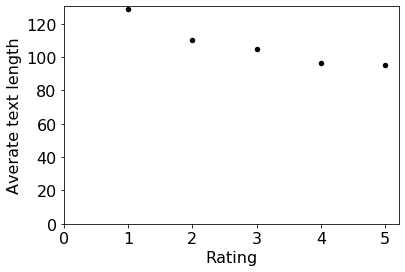

In [24]:
#q18

rateDict = buketize("rating")
lenTxt = 0
avgLen = 0
avgLenList = []
kList = []
for k,v in rateDict.items():
    for i in range(len(wholeList)):
        if k == getattr(wholeList[i], "rating"):
            lenTxt += len(getattr(wholeList[i], "text"))
    avgLen = lenTxt/v
    avgLenList.append(avgLen)
    kList.append(k)
    avgLen = 0
    lenTxt = 0
scatter(kList, avgLenList, xlabel="Rating", ylabel="Averate text length")

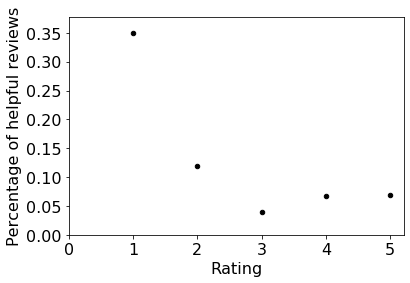

In [25]:
#q19
perHelp = 0
helpScore = 0
perHelpList = []
for k,v in rateDict.items():
    for i in range(len(wholeList)):
        if k == getattr(wholeList[i], "rating"):
            if getattr(wholeList[i], "num_helpful")!=0:
                helpScore += 1
    perHelp = helpScore/v
    perHelpList.append(perHelp)
    perHelp = 0
    helpScore = 0
scatter(kList, perHelpList, xlabel="Rating", ylabel="Percentage of helpful reviews")

In [26]:

asinDict = buketize("asin")
totRate = 0
avgRate = 0
proRateDict = {}
for k,v in asinDict.items():
    for i in range(len(wholeList)):
        if k == getattr(wholeList[i], "asin"):
            totRate += getattr(wholeList[i], "rating")
    avgRate = totRate/v
    proRateDict[k] = avgRate
    avgRate = 0
    totRate = 0


In [27]:
#q20
proRateDict2 = {}
for k in proRateDict.keys():
    for key in proDict.keys():
        if k == key:
            proRateDict2[proDict[key]] = proRateDict[k]
proRateDict2

{'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers': 4.666666666666667,
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black': 4.583333333333333,
 'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders': 4.7272727272727275,
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta': 4.6,
 'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta': 4.506039150354019,
 'All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers': 4.590163934426229,
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta': 4.574468085106383,
 'Kindle Oasis E-reader with Leather Charging Cover - Merlot, 6 High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers': 4.866666666666666,
 'Amazon Tap Smart Assista

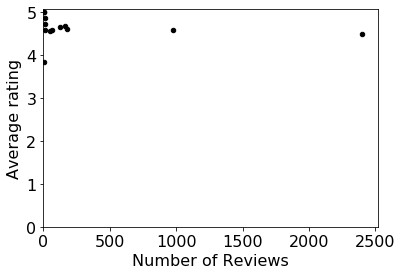

In [28]:
#q21
numTxt = 0
numTxtList = []
vList = []
for k,v in proRateDict.items():
    for i in range(len(wholeList)):
        if k == getattr(wholeList[i], "asin"):
            numTxt += 1
    numTxtList.append(numTxt)
    numTxt = 0
    vList.append(v)

scatter(numTxtList, vList, xlabel="Number of Reviews", ylabel="Average rating")

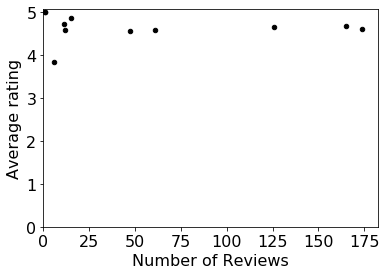

In [29]:
#q22
newTxtList = []
delNumList = []
vList2 = []
for i in range(len(numTxtList)):
    if numTxtList[i] <= 500:
        newTxtList.append(numTxtList[i])
        for j in range(len(vList)):
            if i == j:
                vList2.append(vList[j])

scatter(newTxtList, vList2, xlabel="Number of Reviews", ylabel="Average rating")

In [30]:
import matplotlib, pandas
def plot_dict(d, label="Number of reviews", xlabel = "Month"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

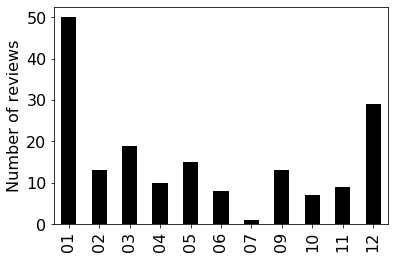

In [31]:
#q23
def mon_numRev_relation(productName):
    monList = []
    monList2 = []
    asinPro = ""
    numMonRev = 0
    numMonList = []
    q23Dict = {}
    for k,v in proDict.items():
        if v == productName:
            asinPro = k
    for i in range(len(wholeList)):
        if asinPro == getattr(wholeList[i], "asin"):
            monList.append(int(getattr(wholeList[i], "date")[5:7]))
    monList = list(set(monList))
    for i in range(len(monList)):
        if monList[i] < 10:
            monList2.append("0" + str(monList[i]))
        else:
            monList2.append(str(monList[i]))
    for i in range(len(monList2)):
        for j in range(len(wholeList)):
            if getattr(wholeList[j], "asin") == asinPro:
                if monList2[i] == getattr(wholeList[j], "date")[5:7]:
                    numMonRev += 1
        numMonList.append(numMonRev)
        numMonRev = 0 
    for i in range(len(monList2)):
        for j in range(len(numMonList)):
            if i == j:
                q23Dict[monList2[i]] = numMonList[j]
    return plot_dict(q23Dict)
mon_numRev_relation( 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case' )

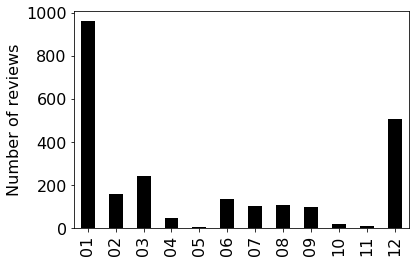

In [32]:
#q24
mon_numRev_relation('Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta' )

In [36]:
def find_subdir(path):
    fileList1 = []
    fileList2 = []
    fileList3 = []
   
    pathList = []
    pathList2 = []
    if os.path.isdir(path) == True:
        fileList1 = os.listdir(path) #open path to see if there are any subdir
        
        for i in range(len(fileList1)):
            if os.path.isdir(os.path.join(path, fileList1[i])) == True: #check if subdir
                #pathList.append(os.path.join(path, fileList1[i]))
                pathList += find_subdir(os.path.join(path, fileList1[i]))
                
            else:
                pathList.append(os.path.join(path,fileList1[i]))
                
    # delete all ".DS_Store" of dir
    for i in range(len(pathList)):
        if ".DS_Store" in pathList[i]:
            continue
        else:
            pathList2.append(pathList[i])# delete all ".DS_Store" of dir
    return pathList2
        
                

In [37]:
#q25
find_subdir('broken_file/rating4/very_helpful')

['broken_file/rating4/very_helpful/very_helpful.json']

In [41]:
#q26
list26 = find_subdir('broken_file/rating5')
sorted(list26,reverse = True)

['broken_file/rating5/others.json', 'broken_file/rating5/helpful/helpful.json']

In [43]:
#q27
brkList = find_subdir('broken_file')
sorted(brkList, reverse = True)

['broken_file/rating5/others.json',
 'broken_file/rating5/helpful/helpful.json',
 'broken_file/rating4/very_helpful/very_helpful.json',
 'broken_file/rating4/others/short/short.json',
 'broken_file/rating4/others/others/others.json',
 'broken_file/rating4/not_helpful.json',
 'broken_file/rating3/others/others.json',
 'broken_file/rating3/long/long.json',
 'broken_file/others.json']

In [53]:
#q28
jsonDict = {}
def read_brkjson_file(name):
    f = open(name, encoding="utf-8")
    msg = f.read()
    f.close()
    return ast.literal_eval(msg)
for i in range(len(brkList)):
    jsonDict.update(read_brkjson_file(brkList[i]))
asinList28 = []
for k,v in jsonDict.items():
    asinList28.append(v[1])
asinList28 = list(set(asinList28))
len(asinList28)

1

In [92]:
#q29
q29List = []
json_str = json.dumps(jsonDict)
f = open("data/broken_data.json", "w", encoding="utf-8")
f.write(json_str)
f.close()
q29List = get_reviews("review3.csv", "broken_data.json")
os.remove('data/broken_data.json')
len(wholeList)+len(q29List)

4995

In [108]:
#q30
newList = wholeList + q29List
rate30 = 0
num30 = 0
avg30 = 0
for k,v in proDict.items():
        if v == "Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta":
            asinPro = k
for i in range(len(newList)):
        if asinPro == getattr(newList[i], "asin"):
            rate30 += getattr(newList[i], "rating")
            num30 += 1
avg30 = rate30/num30
rateOld = 0
numOld = 0
avgOld = 0
for i in range(len(wholeList)):
    if asinPro == getattr(wholeList[i], "asin"):
            rateOld += getattr(wholeList[i], "rating")
            numOld += 1
avgOld = rateOld/numOld
((avg30-avgOld)/avgOld)*100

-0.039407079451942564

In [109]:
# project: p9
# submitter: stang63
# partner: None
